# Import

In [1]:
import numpy as np 
import pandas as pd 
from pandas import Series
from datetime import datetime 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

from sklearn.metrics import confusion_matrix,f1_score,plot_confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sf-dst-scoring/sample_submission.csv
/kaggle/input/sf-dst-scoring/train.csv
/kaggle/input/sf-dst-scoring/test.csv


# Prepare function

In [54]:
"""Here is a function, which will show us how good is the model.
   I.e.: ROC AUC,F1 score and confusion matrix """

def show_metrics(x,Y_test,Y_probs,Y_pred):
    
    fpr, tpr, threshold = roc_curve(Y_test, Y_probs)
    roc_auc = roc_auc_score(Y_test, Y_probs)

    plt.figure()
    plt.plot([0, 1], label='Baseline', linestyle='--')
    plt.plot(fpr, tpr, label = 'Regression')
    plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()
    print('F1 score:',f1_score(Y_test, Y_pred))
    plot_confusion_matrix(model, x, Y_test)

# Data

In [2]:
# Loading dataset:
DATA_DIR = '/kaggle/input/sf-dst-scoring/'
train = pd.read_csv(DATA_DIR+'/train.csv')
test = pd.read_csv(DATA_DIR+'test.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')
# Let's take a look at our data:
display(train.head())
display(train.info())
display(test.head())
display(test.info())


,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

None

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

None

In [3]:
sample_submission.info()
sample_submission.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24354 entries, 0 to 24353
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  24354 non-null  int64  
 1   default    24354 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 380.7 KB


,client_id,default
0,66799,0.441004
1,25379,0.138092
2,28825,0.373370
3,37530,0.476501
4,4264,0.304640


In [4]:
# Combine train and test to make the common stucture:
train['sample'] = 1 # Marking train 
test['sample'] = 0 # Marking test 
test['default'] = 0 # And add 'defaut' column to test, filling it with zeroes

data = test.append(train, sort=False).reset_index(drop=True) # Combine

In [5]:
data.info()
data.sample(5)# Using sample() instead of head() for more visibility

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,sample,default
23358,32850,09FEB2014,SCH,M,32,N,N,1,0,-1.884069,2,40,2,3,25000,1,3,N,0,0
92312,70918,19MAR2014,GRD,M,42,Y,Y,0,0,-2.208189,0,80,1,2,80000,2,4,Y,1,0
33753,70700,19MAR2014,SCH,F,37,Y,N,0,0,-1.561363,4,50,2,3,35000,1,2,N,0,0
1759,84071,01APR2014,GRD,M,37,Y,Y,0,0,-2.065609,1,70,2,3,40000,4,3,N,0,0
79435,85700,02APR2014,GRD,F,33,N,N,0,0,-1.558022,1,50,2,3,60000,2,4,N,1,0


Data Description
You have been provided with information from the borrower's personal data and the fact of a default.

Column descriptions:
* client_id - client id 
* education - the level of education
* sex - gender
* age - how old is borrower
* car - car presence
* car_type - foreign car presense
* decline_app_cnt - number of rejected past applications
* good_work - whether the borrower has a "good" job
* bki_request_cnt - number of requests to the BKI
* home_address - home address categorizer
* work_address - work address categorizer
* income - borrower's income
* foreign_passport - does the borrower has a foreign passport
* sna - relations of the borrower with bank clients
* first_time - age of information about the borrower
* score_bki - scoring score according to data from the BKI
* region_rating - rating of the borrower's region
* app_date - application date
* default - does borrower have a default

Our goal is to predict the borrower's status by training the model

# Cleaning and Prepping Data

## 1. Working with NAN 

In [6]:
#Looking for NaN's in our data:
data.isnull().sum()

client_id             0
app_date              0
education           478
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
sample                0
default               0
dtype: int64

In [7]:
"""We have NaN's only in education column.
There aren't to many of them, so I think it will be easer
to inplace them with more frequently data:"""
data['education'].value_counts()

SCH    57998
GRD    34768
UGR    14748
PGR     1865
ACD      291
Name: education, dtype: int64

In [8]:
data.education = data.education.mask( data.education.isna(),'SCH')# replace with "SCH" 
data.isnull().sum()# Check 

client_id           0
app_date            0
education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
score_bki           0
bki_request_cnt     0
region_rating       0
home_address        0
work_address        0
income              0
sna                 0
first_time          0
foreign_passport    0
sample              0
default             0
dtype: int64

# **2. Working with features**

education

In [9]:
# Education is a rank variable, so I will mark it with ascending:
data.education = data.education.mask(data.education == 'SCH',1)
data.education = data.education.mask(data.education == 'GRD',2)            
data.education = data.education.mask(data.education == 'UGR',3)                                
data.education = data.education.mask(data.education == 'PGR',4)
data.education = data.education.mask(data.education == 'ACD',5)
data.education.value_counts()

1    58476
2    34768
3    14748
4     1865
5      291
Name: education, dtype: int64

**app_date**

In [10]:
# Let's look on dates
data.app_date.sample(5)

36074    28APR2014
77815    09JAN2014
78962    28JAN2014
50721    29MAR2014
53147    26APR2014
Name: app_date, dtype: object

In [11]:
"""It is not convenient to work with objects.
   Let's convert this column to datetime: """

data.app_date = pd.to_datetime(data.app_date)
data.app_date.sample(5)


34913   2014-04-10
80929   2014-03-24
81511   2014-01-06
49933   2014-03-12
97789   2014-04-30
Name: app_date, dtype: datetime64[ns]

In [12]:
"""Now we can generate some new features:"""

# Here we will find how many days have gone:
data['days_ago'] = (datetime.now() - data.app_date).dt.days
# And the number of month, maybe it will be useful:
data['app_month'] = data.app_date.dt.month

Group the features:

In [13]:
#It will be convenient to group our variables by categories:

bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']
cat_cols = ['app_month', 'home_address','work_address',
            'sna', 'first_time','education']
    
num_cols = ['days_ago', 'age', 'decline_app_cnt', 'score_bki',
            'bki_request_cnt', 'region_rating', 'income'
           ]

working with num_cols

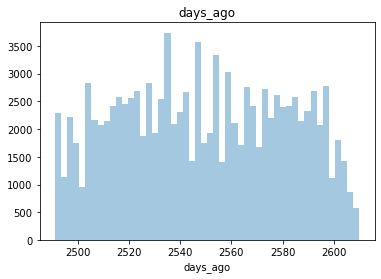

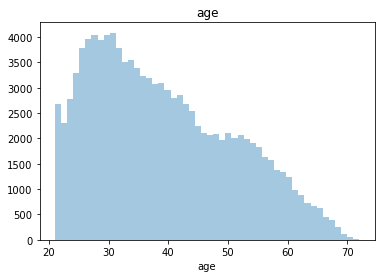

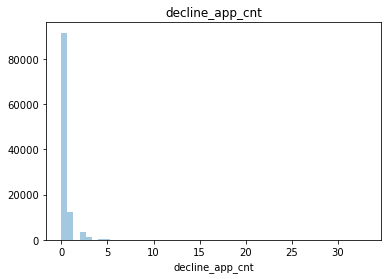

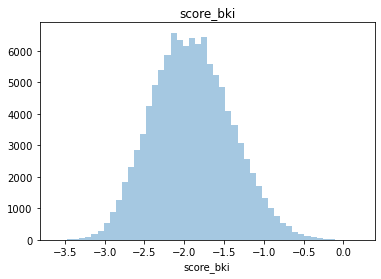

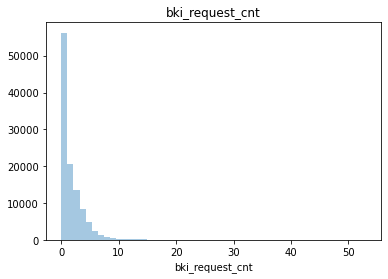

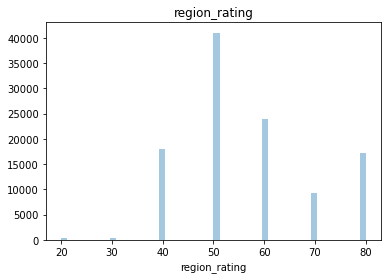

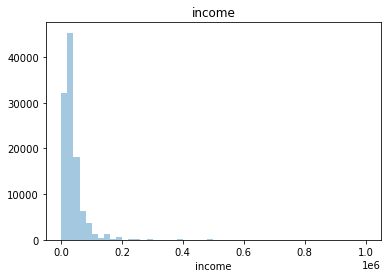

In [14]:
#Now we need to draw some graphs, to check the distribution:
for i in num_cols:
    plt.figure()
    sns.distplot(data[i], kde = False, rug=False)
    plt.title(i)
    plt.show()

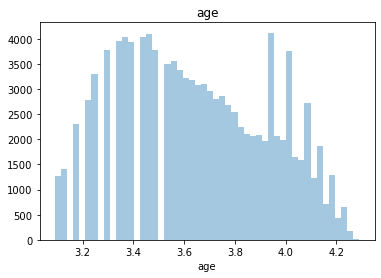

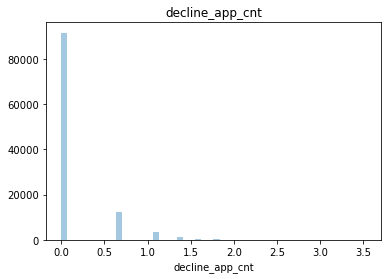

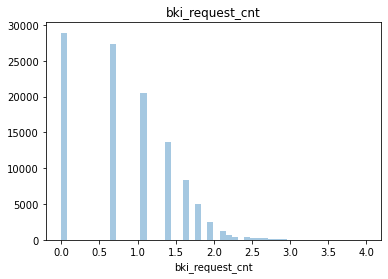

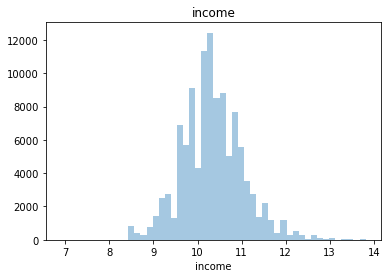

In [15]:
# This is the list of features,which need to be normalized:
num_cols_log = ['age', 'decline_app_cnt',
                'bki_request_cnt', 'income', 
               ]

# Let's logarithm them:
for i in num_cols_log:
    data[i] = np.log(data[i] + 1)
    
# And check for the distribution:
for i in num_cols_log:
    plt.figure()
    sns.distplot(data[i], kde = False, rug=False)
    plt.title(i)
    plt.show()

working with bins

In [16]:
#Transforming binary variables:

for column in bin_cols:
     data[column] = LabelEncoder().fit_transform(data[column])
#Model can read only numbers,so now our bins is zero an one:
data.sample(5)


,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,...,home_address,work_address,income,sna,first_time,foreign_passport,sample,default,days_ago,app_month
8593,52001,2014-02-28,2,0,3.465736,0,0,0.0,0,-1.038158,...,2,3,10.239996,4,1,0,0,0,2552,2
50041,53273,2014-03-02,1,0,3.931826,0,0,0.0,0,-1.242917,...,3,3,9.798183,1,3,0,1,0,2550,3
67524,7040,2014-01-14,1,0,3.610918,0,0,0.0,0,-2.051970,...,2,3,10.463132,4,1,0,1,0,2597,1
17680,71650,2014-03-19,2,0,3.931826,0,0,0.0,0,-2.622664,...,2,3,9.615872,4,1,0,0,0,2533,3
61359,99832,2014-04-17,2,1,3.433987,1,1,0.0,0,-2.649148,...,2,3,10.404293,2,3,0,1,0,2504,4


# EDA

<AxesSubplot:>

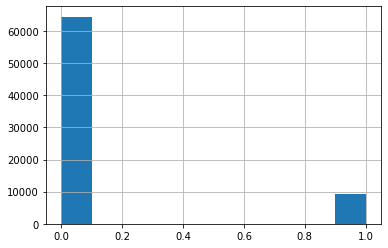

In [17]:
data[data['sample'] == 1].default.hist()

There are less default clients than non-default by about six times.
It may has a bad ifluence on our model.

<AxesSubplot:>

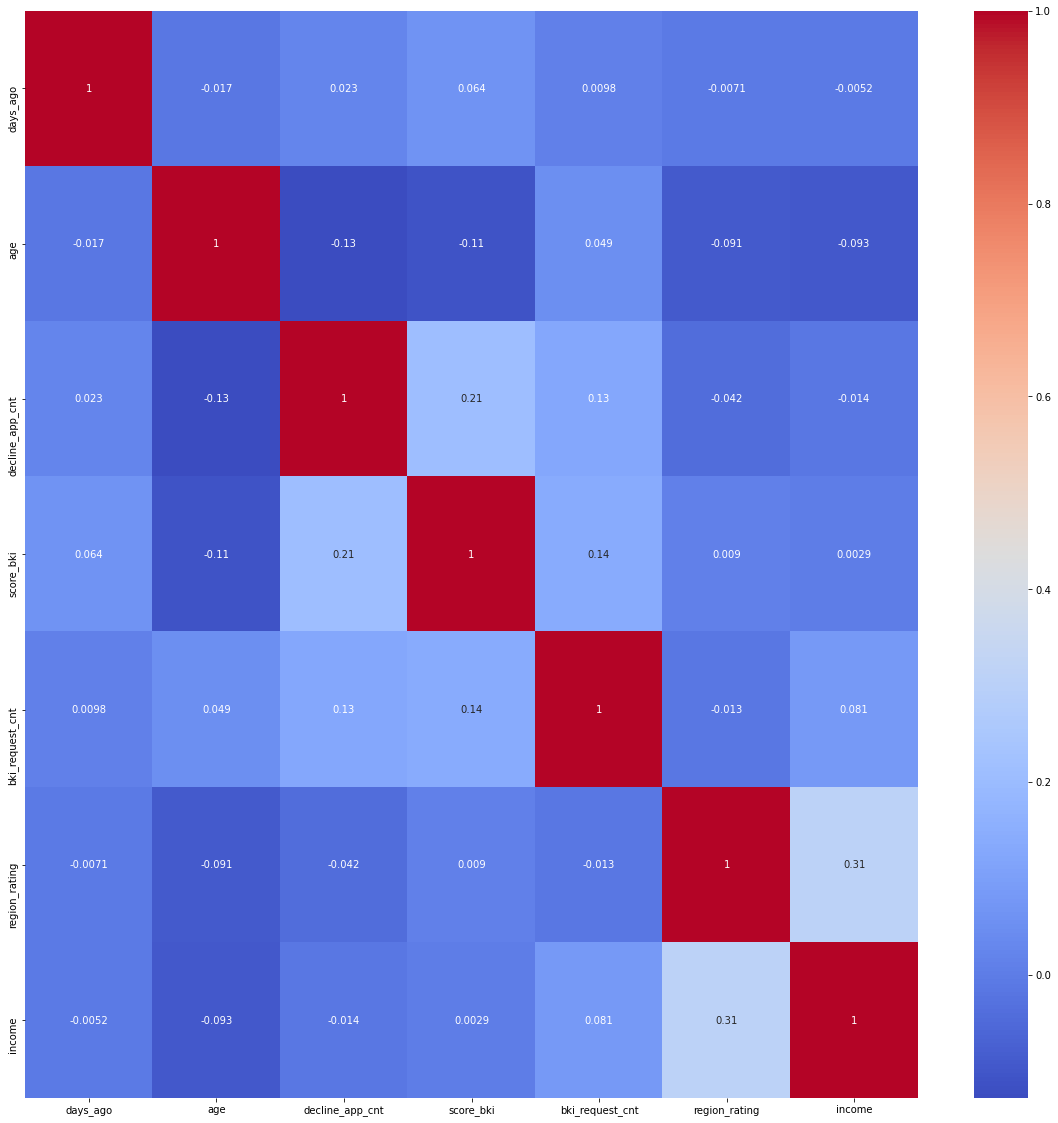

In [18]:
"""Let's draw the correlation plot for train data
(data['sample'] == 1):"""

correlation = data[data['sample'] == 1][num_cols].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

As we can see, there is no high correlation. Only between the region and income, but I think this is not the reason to drop someone of them out. 

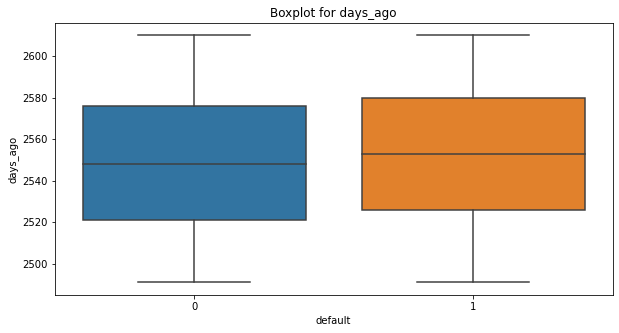

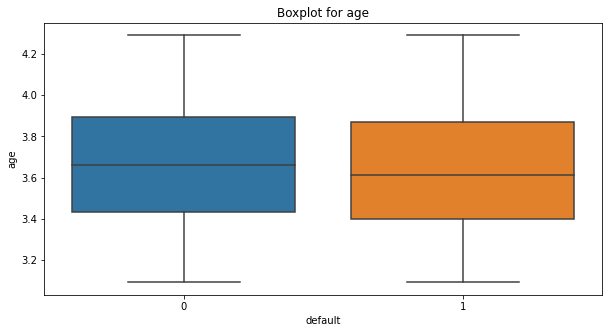

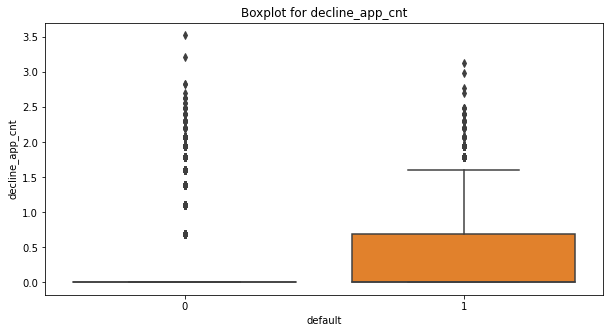

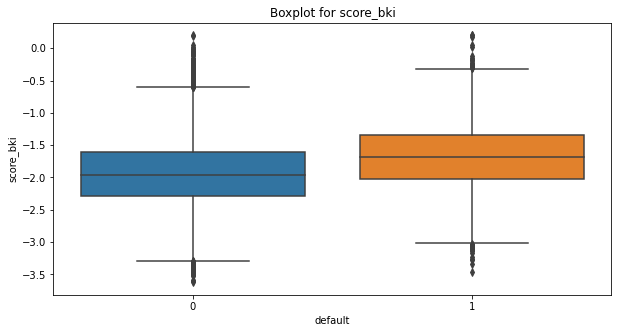

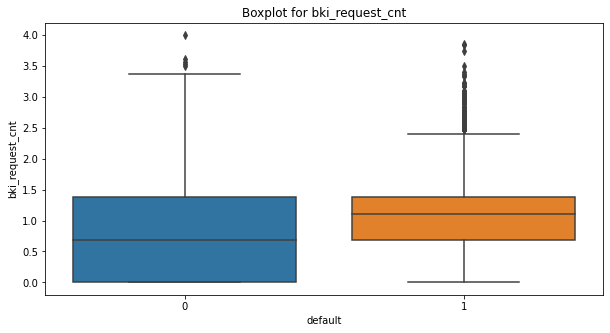

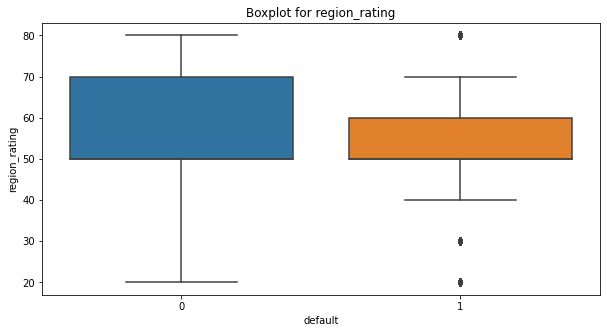

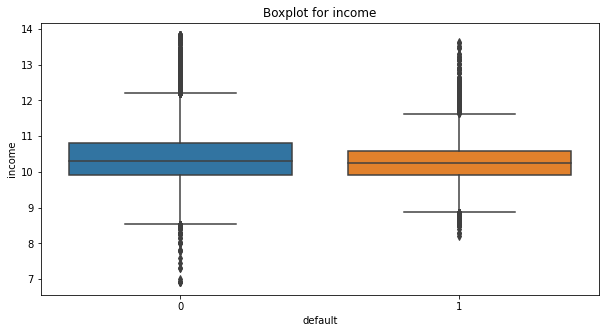

In [19]:
# Drawing boxplots for train values:

for i in num_cols:
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(x=data[data['sample'] == 1].default,
                y=data[data['sample'] == 1][i])
                
    ax.set_title('Boxplot for ' + i)
    plt.show()

We can see that:
1. Default clients filled out orders earlier than non-default ones, in average.
I don't think it matters a lot, because the difference between medians is not so big.
2. Non-default clients are on average older than default ones.
3. Default clients have a higher number of declined apps than non-default ones.
4. The score is on average higher for default clients, which is really strange.
5. Default clients have a higher number of requests on average
6. Region has a good influence on the borrower's credit story.
7. The income of non-default clients is higher.
8. There are many outliers in our data, but Scaler will fix it later.

Significance

Text(0.5, 0, 'F-value')

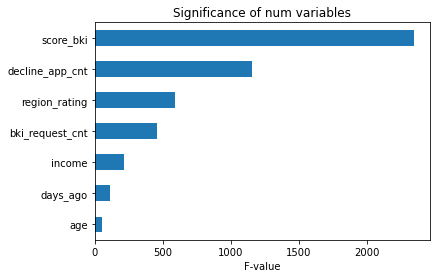

In [20]:
#Significance of num variables
imp_num = Series(f_classif(data[data['sample'] == 1][num_cols],
                           data[data['sample'] == 1]['default'])[0],
                           index = num_cols
                           )
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')
plt.title('Significance of num variables')
plt.xlabel('F-value')

Text(0.5, 1.0, 'Significance of bin variables')

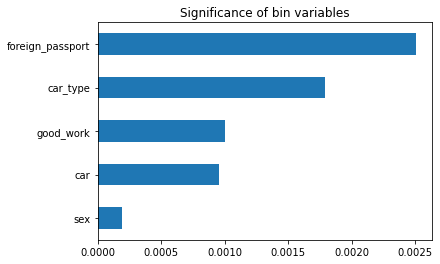

In [21]:
# Significance of bin variables

imp_bin = Series(mutual_info_classif(data[data['sample'] == 1][bin_cols],
                                     data[data['sample'] == 1]['default'],
                                     discrete_features =True),
                                     index = bin_cols
                                     )
imp_bin.sort_values(inplace = True)
imp_bin.plot(kind = 'barh')
plt.title('Significance of bin variables')

Text(0.5, 1.0, 'Significance of cat variables')

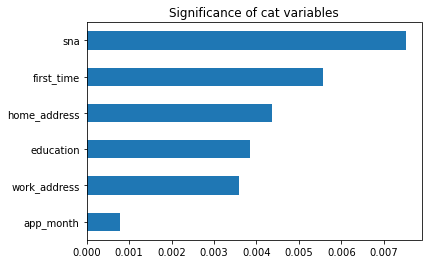

In [22]:
cat_cols = ['app_month', 'home_address','work_address', 'sna', 'first_time','education']

imp_cat = Series(mutual_info_classif(data[data['sample'] == 1][cat_cols],
                                     data[data['sample'] == 1]['default'],
                                     discrete_features =True),
                                     index = cat_cols
                                     )
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')
plt.title('Significance of cat variables')

# Data Preprocessing

In [23]:
#Transforming categorical variables, instead of education:
cat_cols = ['app_month', 'home_address','work_address', 'sna', 'first_time']
x_cat_train = OneHotEncoder(sparse = False).fit_transform(data[data['sample'] == 1][cat_cols].values)
x_cat_val = OneHotEncoder(sparse = False).fit_transform(data[data['sample'] == 0][cat_cols].values)

print(x_cat_train.shape)
print(x_cat_val.shape)

(73799, 18)
(36349, 18)


In [24]:
poly = PolynomialFeatures(2)#Set the power 
# And transform numeric variables:
x_train = poly.fit_transform(data[data['sample'] == 1][num_cols].values)
x_val = poly.fit_transform(data[data['sample'] == 0][num_cols].values)
# Use Scaler:
x_num_train = StandardScaler().fit_transform(x_train)
x_num_val = StandardScaler().fit_transform(x_val)

In [25]:
# Merge our prepared data, and don't forget to split the test data:

X = np.hstack([x_num_train,
               data[data['sample'] == 1][bin_cols+['education']].values,
               x_cat_train]
              )
Y = data[data['sample'] == 1]['default'].values

id_test = data[data['sample'] == 0].client_id
test = np.hstack([x_num_val,
                  data[data['sample'] == 0][bin_cols+['education']].values,
                  x_cat_val]                
                )

In [26]:
# Split  data to train our model:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42, shuffle = True)

# Model 

Regularization

In [27]:
""" Here we'll try to find out the best norm (penalty)
and inverse of regularization strength (C) """
from sklearn.model_selection import GridSearchCV

# Set the borders
C = np.logspace(0, 4, 10)

penalty = ['l1', 'l2']
hyperparameters = dict(C=C, penalty=penalty)
model = LogisticRegression()
model.fit(X_train, y_train)

clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 7.742636826811269


Training model

In [52]:
# Now enter our parameters in model:
model = LogisticRegression(penalty = 'l2', C=7.742636826811269, max_iter=500)
# And train it:
model.fit(X_train, y_train)

LogisticRegression(C=7.742636826811269, max_iter=500)

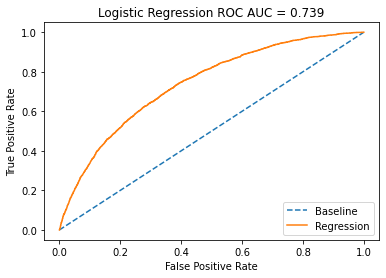

F1 score: 0.04376068376068376


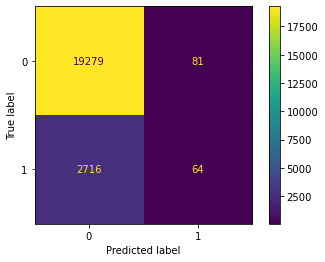

In [53]:
# Let's make some metrics

y_probs = model.predict_proba(X_test)
y_probs = y_probs[:,1]
y_pred = model.predict(X_test)

show_metrics(X_test,y_test,y_probs,y_pred)




ROC_AUC shows us good results, but F1 score and Confusion matrix make me think about how to correct the model. Our model is too kind.As we remember from the beginning of EDA, default and non-default parameters have a big disproportion. Let's balance them with class_weight='balanced'


In [30]:
model = LogisticRegression(penalty = 'l2', C=1, max_iter=500,class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(C=1, class_weight='balanced', max_iter=500)

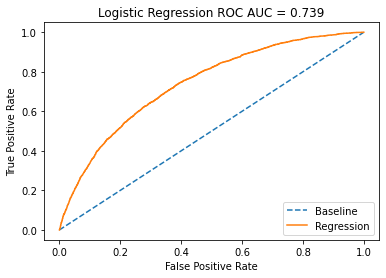

F1 score: 0.04376068376068376


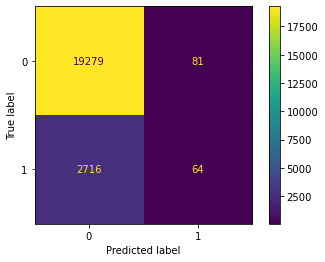

In [55]:
y_probs = model.predict_proba(X_test)# 
y_probs = y_probs[:,1]
y_pred = model.predict(X_test)


show_metrics(X_test,y_test,y_probs,y_pred)





Not so good, need to try other variants

In [32]:
# Let's calculate parameters:
model = LogisticRegression(random_state=42)
param_grid = [
    {'penalty': ['l1'], 
     'solver': ['liblinear', 'lbfgs'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr']}, 
    {'penalty': ['l2'], 
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr']}, 
    {'penalty': ['none'], 
     'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr']}
]

gridsearch = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_
## печатаем параметры
best_parameters = model.get_params()

In [33]:
best_parameters

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

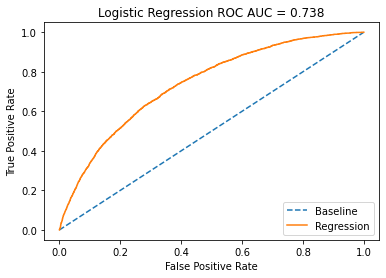

F1 score: 0.34063566169868914


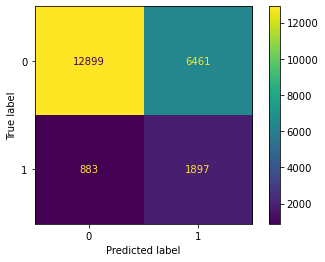

In [34]:
# Now use best_parameters
model = LogisticRegression(C=1.0,
 class_weight='balanced',
 dual= False,
 fit_intercept= True,
 intercept_scaling= 1,
 l1_ratio= None,
 max_iter= 100,
 multi_class= 'auto',
 n_jobs= None,
 penalty='l2',
 random_state= 42,
 solver='lbfgs',
 tol= 0.0001,
 verbose= 0,
 warm_start= False)
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)# 
y_probs = y_probs[:,1]
y_pred = model.predict(X_test)


show_metrics(X_test,y_test,y_probs,y_pred)




Almost the same. Let's try LogisticRegressionCV 

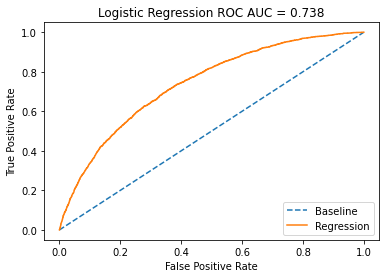

F1 score: 0.34002509410288584


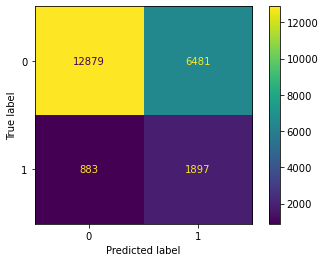

In [35]:
model = LogisticRegressionCV(
    Cs = np.linspace(0.2,2,10),
    penalty = 'l1',
    scoring = 'f1',
    solver = 'saga',
    max_iter = 1000, 
    random_state=42, 
    class_weight='balanced')

model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)# 
y_probs = y_probs[:,1]
y_pred = model.predict(X_test)


show_metrics(X_test,y_test,y_probs,y_pred)


# Conclusion
I have tested four varians of Logistic regression model and cleared out that the most influence on the result has a balance parameter. On my opinion, it will be useful to get more data about default borrowers to eliminate the disproportion between 'good' and 'bad' clients. 

# Submission

In [47]:
#Train the model on the whole data by Logistic Regression with best parameters:

model = LogisticRegression(C=1.0,
 class_weight='balanced',
 dual= False,
 fit_intercept= True,
 intercept_scaling= 1,
 l1_ratio= None,
 max_iter= 100,
 multi_class= 'auto',
 n_jobs= None,
 penalty='l2',
 random_state= 42,
 solver='lbfgs',
 tol= 0.0001,
 verbose= 0,
 warm_start= False)
    
model.fit(X, Y)
probs = model.predict_proba(test)
probs = probs[:,1]

In [48]:
# Saving the submission:
my_submission = pd.DataFrame({'client_id': id_test, 
                            'default': probs})
my_submission.to_csv('submission.csv', index=False)

my_submission

,client_id,default
0,74835,0.265823
1,17527,0.823666
2,75683,0.300826
3,26883,0.362078
4,28862,0.122611
...,...,...
36344,83775,0.812257
36345,106254,0.111101
36346,81852,0.805153
36347,1971,0.611307
